<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#New-York" data-toc-modified-id="New-York-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>New York</a></span></li><li><span><a href="#Datatype-conversions" data-toc-modified-id="Datatype-conversions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Datatype conversions</a></span></li><li><span><a href="#Merge-dataframes" data-toc-modified-id="Merge-dataframes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merge dataframes</a></span></li><li><span><a href="#Plot-Bands" data-toc-modified-id="Plot-Bands-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot Bands</a></span></li><li><span><a href="#Plot-monthly" data-toc-modified-id="Plot-monthly-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot monthly</a></span><ul class="toc-item"><li><span><a href="#Normalize" data-toc-modified-id="Normalize-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Normalize</a></span></li></ul></li><li><span><a href="#SR-Band-3" data-toc-modified-id="SR-Band-3-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>SR Band 3</a></span></li><li><span><a href="#SR-Band-4" data-toc-modified-id="SR-Band-4-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>SR Band 4</a></span></li></ul></div>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats
import pandas.plotting
import datetime
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## New York

In [53]:
ny19 = pd.read_csv('D:\Google Earth Engine\CSV files\ee-chart_ny19_T1L2.csv')
ny19.head()

,system:time_start,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,"Jan 2, 2019","10,877.838","11,727.744","13,236.926","13,554.565","15,040.172","13,325.544","12,791.532"
1,"Jan 9, 2019","9,449.261","9,680.286","10,122.394","10,349.655","11,732.358","11,935.044","11,050.645"
2,"Jan 9, 2019","9,541.56","9,814.567","10,290.552","10,558.994","11,982.861","12,248.409","11,362.054"
3,"Jan 25, 2019","10,040.215","10,318.885","10,822.119","11,064.641","12,235.969","12,429.089","11,624.774"
4,"Jan 25, 2019","11,153.185","11,524.063","12,121.188","12,477.606","13,819.397","14,148.706","13,122.383"


In [54]:
ny19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   system:time_start  57 non-null     object
 1   SR_B1              57 non-null     object
 2   SR_B2              57 non-null     object
 3   SR_B3              57 non-null     object
 4   SR_B4              57 non-null     object
 5   SR_B5              57 non-null     object
 6   SR_B6              57 non-null     object
 7   SR_B7              57 non-null     object
dtypes: object(8)
memory usage: 3.7+ KB


In [55]:
# Rename 1st column
ny19.rename({'system:time_start':'Date'}, axis=1, inplace=True)

In [56]:
# Check
ny19.head()

,Date,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,"Jan 2, 2019","10,877.838","11,727.744","13,236.926","13,554.565","15,040.172","13,325.544","12,791.532"
1,"Jan 9, 2019","9,449.261","9,680.286","10,122.394","10,349.655","11,732.358","11,935.044","11,050.645"
2,"Jan 9, 2019","9,541.56","9,814.567","10,290.552","10,558.994","11,982.861","12,248.409","11,362.054"
3,"Jan 25, 2019","10,040.215","10,318.885","10,822.119","11,064.641","12,235.969","12,429.089","11,624.774"
4,"Jan 25, 2019","11,153.185","11,524.063","12,121.188","12,477.606","13,819.397","14,148.706","13,122.383"


## Datatype conversions

In [57]:
# Convert Date from object to datetime
ny19['Date'] = pd.to_datetime(ny19['Date'], errors='coerce')

In [58]:
# Check
ny19.dtypes

Date     datetime64[ns]
SR_B1            object
SR_B2            object
SR_B3            object
SR_B4            object
SR_B5            object
SR_B6            object
SR_B7            object
dtype: object

In [59]:
# Convert bands from object to float
ny19['SR_B1'] = ny19['SR_B1'].str.replace(',','').astype(np.float64)
ny19['SR_B2'] = ny19['SR_B2'].str.replace(',','').astype(np.float64)
ny19['SR_B3'] = ny19['SR_B3'].str.replace(',','').astype(np.float64)
ny19['SR_B4'] = ny19['SR_B4'].str.replace(',','').astype(np.float64)
ny19['SR_B5'] = ny19['SR_B5'].str.replace(',','').astype(np.float64)
ny19['SR_B6'] = ny19['SR_B6'].str.replace(',','').astype(np.float64)
ny19['SR_B7'] = ny19['SR_B7'].str.replace(',','').astype(np.float64)
ny19.head()

,Date,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,2019-01-02,10877.838,11727.744,13236.926,13554.565,15040.172,13325.544,12791.532
1,2019-01-09,9449.261,9680.286,10122.394,10349.655,11732.358,11935.044,11050.645
2,2019-01-09,9541.560,9814.567,10290.552,10558.994,11982.861,12248.409,11362.054
3,2019-01-25,10040.215,10318.885,10822.119,11064.641,12235.969,12429.089,11624.774
4,2019-01-25,11153.185,11524.063,12121.188,12477.606,13819.397,14148.706,13122.383


In [60]:
# Check for null values
ny19.isnull().sum()

Date     0
SR_B1    0
SR_B2    0
SR_B3    0
SR_B4    0
SR_B5    0
SR_B6    0
SR_B7    0
dtype: int64

In [61]:
# Read file for 2020 data
ny20 = pd.read_csv('D:\Google Earth Engine\CSV files\ee-chart_ny20_T1L2.csv')

# Read file for 2021 data
ny21 = pd.read_csv('D:\Google Earth Engine\CSV files\ee-chart_ny21_T1L2.csv')

In [62]:
# Look at info
print(ny20.info())
print(ny21.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   system:time_start  55 non-null     object
 1   SR_B1              55 non-null     object
 2   SR_B2              55 non-null     object
 3   SR_B3              55 non-null     object
 4   SR_B4              55 non-null     object
 5   SR_B5              55 non-null     object
 6   SR_B6              55 non-null     object
 7   SR_B7              55 non-null     object
dtypes: object(8)
memory usage: 3.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   system:time_start  54 non-null     object
 1   SR_B1              54 non-null     object
 2   SR_B2              54 non-null     object
 3   SR_B3              54 non-null     object

In [63]:
# Rename 1st column
ny20.rename({'system:time_start':'Date'}, axis=1, inplace=True)
ny21.rename({'system:time_start':'Date'}, axis=1, inplace=True)

In [64]:
# Datatype conversions
# Convert Date from object to datetime
ny20['Date'] = pd.to_datetime(ny20['Date'], errors='coerce')
ny21['Date'] = pd.to_datetime(ny21['Date'], errors='coerce')

# Convert bands from object to float
ny20['SR_B1'] = ny20['SR_B1'].str.replace(',','').astype(np.float64)
ny20['SR_B2'] = ny20['SR_B2'].str.replace(',','').astype(np.float64)
ny20['SR_B3'] = ny20['SR_B3'].str.replace(',','').astype(np.float64)
ny20['SR_B4'] = ny20['SR_B4'].str.replace(',','').astype(np.float64)
ny20['SR_B5'] = ny20['SR_B5'].str.replace(',','').astype(np.float64)
ny20['SR_B6'] = ny20['SR_B6'].str.replace(',','').astype(np.float64)
ny20['SR_B7'] = ny20['SR_B7'].str.replace(',','').astype(np.float64)
# Convert bands from object to float
ny21['SR_B1'] = ny21['SR_B1'].str.replace(',','').astype(np.float64)
ny21['SR_B2'] = ny21['SR_B2'].str.replace(',','').astype(np.float64)
ny21['SR_B3'] = ny21['SR_B3'].str.replace(',','').astype(np.float64)
ny21['SR_B4'] = ny21['SR_B4'].str.replace(',','').astype(np.float64)
ny21['SR_B5'] = ny21['SR_B5'].str.replace(',','').astype(np.float64)
ny21['SR_B6'] = ny21['SR_B6'].str.replace(',','').astype(np.float64)
ny21['SR_B7'] = ny21['SR_B7'].str.replace(',','').astype(np.float64)

In [65]:
# Check
print(ny20.dtypes)
print(ny21.dtypes)

Date     datetime64[ns]
SR_B1           float64
SR_B2           float64
SR_B3           float64
SR_B4           float64
SR_B5           float64
SR_B6           float64
SR_B7           float64
dtype: object
Date     datetime64[ns]
SR_B1           float64
SR_B2           float64
SR_B3           float64
SR_B4           float64
SR_B5           float64
SR_B6           float64
SR_B7           float64
dtype: object


In [66]:
ny21.head()

,Date,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,2021-01-07,9630.643,9924.007,10430.416,10675.342,12313.689,12601.460,11607.310
1,2021-01-14,22585.897,22616.058,22388.787,22714.202,24089.497,17717.606,17284.808
2,2021-01-14,24636.432,24601.354,24013.730,24218.223,25312.506,18577.200,18034.391
3,2021-01-23,10116.049,10432.599,10983.827,11294.167,12903.112,13366.579,12345.597
4,2021-01-30,9693.531,9948.111,10407.416,10749.592,12262.919,12735.767,11865.727


In [67]:
# Check for null values
print(ny20.isnull().sum())
print(ny21.isnull().sum())

Date     0
SR_B1    0
SR_B2    0
SR_B3    0
SR_B4    0
SR_B5    0
SR_B6    0
SR_B7    0
dtype: int64
Date     0
SR_B1    0
SR_B2    0
SR_B3    0
SR_B4    0
SR_B5    0
SR_B6    0
SR_B7    0
dtype: int64


## Merge dataframes

In [68]:
df0 = pd.concat([ny19, ny20])
df1 = pd.concat([ny20, ny21])

In [69]:
df1['Date']

0    2020-01-05
1    2020-01-12
2    2020-01-12
3    2020-01-21
4    2020-01-28
        ...    
49   2021-11-14
50   2021-11-23
51   2021-12-09
52   2021-12-16
53   2021-12-16
Name: Date, Length: 109, dtype: datetime64[ns]

In [70]:
# Obtain preliminary stats view
def brief_summary(df):
    print(df.head())
    print(df.isnull().sum()/len(df))
    print(df.info())
    print(df.describe())
    print(df.hist())

        Date      SR_B1      SR_B2      SR_B3      SR_B4      SR_B5  \
0 2019-01-02  10877.838  11727.744  13236.926  13554.565  15040.172   
1 2019-01-09   9449.261   9680.286  10122.394  10349.655  11732.358   
2 2019-01-09   9541.560   9814.567  10290.552  10558.994  11982.861   
3 2019-01-25  10040.215  10318.885  10822.119  11064.641  12235.969   
4 2019-01-25  11153.185  11524.063  12121.188  12477.606  13819.397   

       SR_B6      SR_B7  
0  13325.544  12791.532  
1  11935.044  11050.645  
2  12248.409  11362.054  
3  12429.089  11624.774  
4  14148.706  13122.383  
Date     0.0
SR_B1    0.0
SR_B2    0.0
SR_B3    0.0
SR_B4    0.0
SR_B5    0.0
SR_B6    0.0
SR_B7    0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 54
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    112 non-null    datetime64[ns]
 1   SR_B1   112 non-null    float64       
 2   SR_B2   112 no

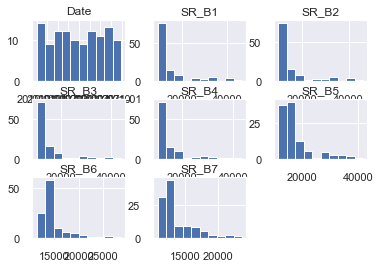

In [71]:
brief_summary(df0)

        Date      SR_B1      SR_B2      SR_B3      SR_B4      SR_B5  \
0 2020-01-05  10615.305  10936.476  11520.642  11822.391  13296.115   
1 2020-01-12   9822.653  10407.260  11407.831  11644.972  12495.207   
2 2020-01-12   9667.686  10274.228  11163.549  11456.523  12287.255   
3 2020-01-21   9774.860  10074.939  10581.547  10862.766  12258.576   
4 2020-01-28  11644.181  12327.984  13808.908  14459.321  16299.265   

       SR_B6      SR_B7  
0  13677.330  12823.476  
1  11449.566  11147.408  
2  11326.466  11003.247  
3  12667.458  11800.729  
4  15792.866  14083.383  
Date     0.0
SR_B1    0.0
SR_B2    0.0
SR_B3    0.0
SR_B4    0.0
SR_B5    0.0
SR_B6    0.0
SR_B7    0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 53
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    109 non-null    datetime64[ns]
 1   SR_B1   109 non-null    float64       
 2   SR_B2   109 no

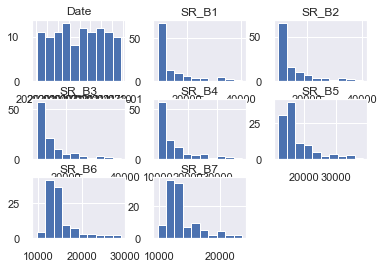

In [72]:
brief_summary(df1)

## Plot Bands

In [73]:
# Create new df with index set to 'Date'
df0_indexed = df0.set_index('Date')

#Create label for indexes
df0_index = df0_indexed.index

df0_indexed.head()

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
Date,,,,,,,
2019-01-02,10877.838,11727.744,13236.926,13554.565,15040.172,13325.544,12791.532
2019-01-09,9449.261,9680.286,10122.394,10349.655,11732.358,11935.044,11050.645
2019-01-09,9541.560,9814.567,10290.552,10558.994,11982.861,12248.409,11362.054
2019-01-25,10040.215,10318.885,10822.119,11064.641,12235.969,12429.089,11624.774
2019-01-25,11153.185,11524.063,12121.188,12477.606,13819.397,14148.706,13122.383


In [74]:
# Melt df
df0_melt = df0.melt(id_vars=['Date'], var_name='SR_Bands', value_name='SR_Band_value')

In [75]:
# Check
df0_melt

,Date,SR_Bands,SR_Band_value
0,2019-01-02,SR_B1,10877.838
1,2019-01-09,SR_B1,9449.261
2,2019-01-09,SR_B1,9541.560
3,2019-01-25,SR_B1,10040.215
4,2019-01-25,SR_B1,11153.185
...,...,...,...
779,2020-12-13,SR_B7,10856.249
780,2020-12-13,SR_B7,11046.186
781,2020-12-22,SR_B7,11441.078
782,2020-12-29,SR_B7,14855.104


In [76]:
# Pivot table; index by Date and SR_Bands
df0_pivot = df0_melt.pivot_table(index=['Date', 'SR_Bands'])
df0_pivot.head()

SR_Band_value
Date       SR_Bands               
2019-01-02 SR_B1         10877.838
           SR_B2         11727.744
           SR_B3         13236.926
           SR_B4         13554.565
           SR_B5         15040.172

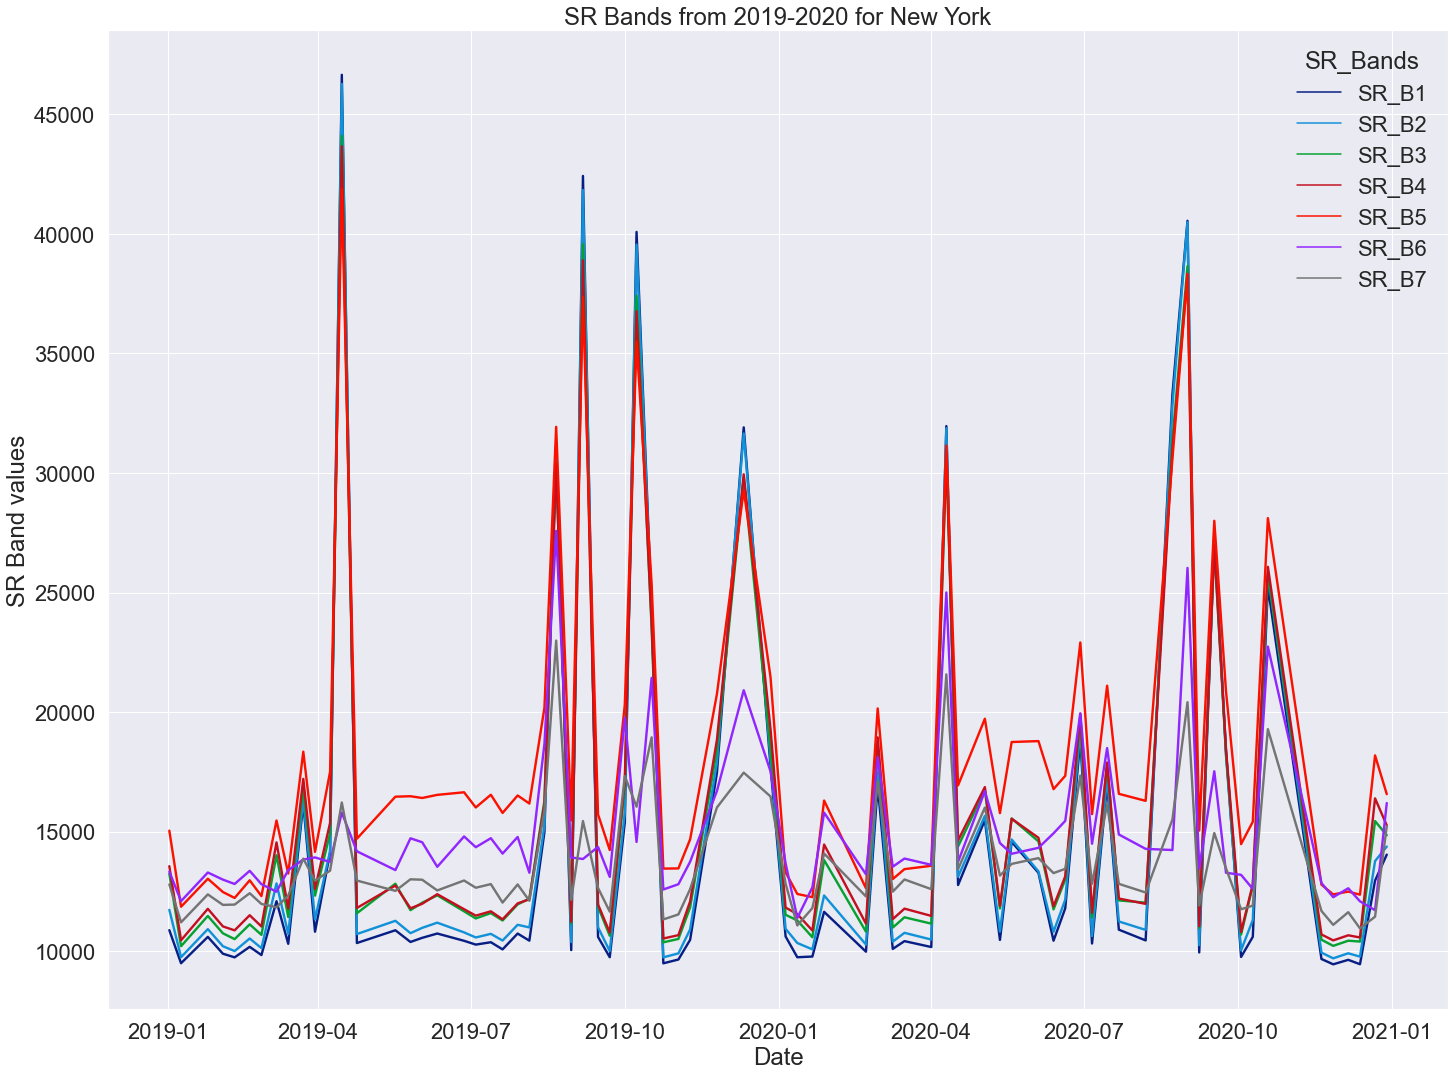

In [77]:
# Create an array with the corresponding SR Band colors from Google Earth Engine
colors = {'SR_B1': "#071e84", 'SR_B2': "#1192d8", 'SR_B3': "#06a131", 'SR_B4': "#c31020", 'SR_B5':"#fb1100", 'SR_B6':"#9126ff", 'SR_B7':"#747474"}

# Plot line plot
plt.figure(figsize=(24,18))
sns.set(font_scale = 2)
sns.lineplot(data=df0_pivot.reset_index(), x='Date', y='SR_Band_value', palette=colors, hue='SR_Bands', linewidth= 2.4)
plt.ylabel('SR Band values')
plt.title('SR Bands from 2019-2020 for New York')
plt.show()

In [78]:
# Do the same for 2020-2021 data
# Create new df with index set to 'Date'
df1_indexed = df1.set_index('Date')

#Create label for indexes
df1_index = df1_indexed.index

# Melt df
df1_melt = df1.melt(id_vars=['Date'], var_name='SR_Bands', value_name='SR_Band_value')

In [79]:
# Pivot table; index by Date and SR_Bands
df1_pivot = df1_melt.pivot_table(index=['Date', 'SR_Bands'])
df1_pivot.head()

SR_Band_value
Date       SR_Bands               
2020-01-05 SR_B1         10615.305
           SR_B2         10936.476
           SR_B3         11520.642
           SR_B4         11822.391
           SR_B5         13296.115

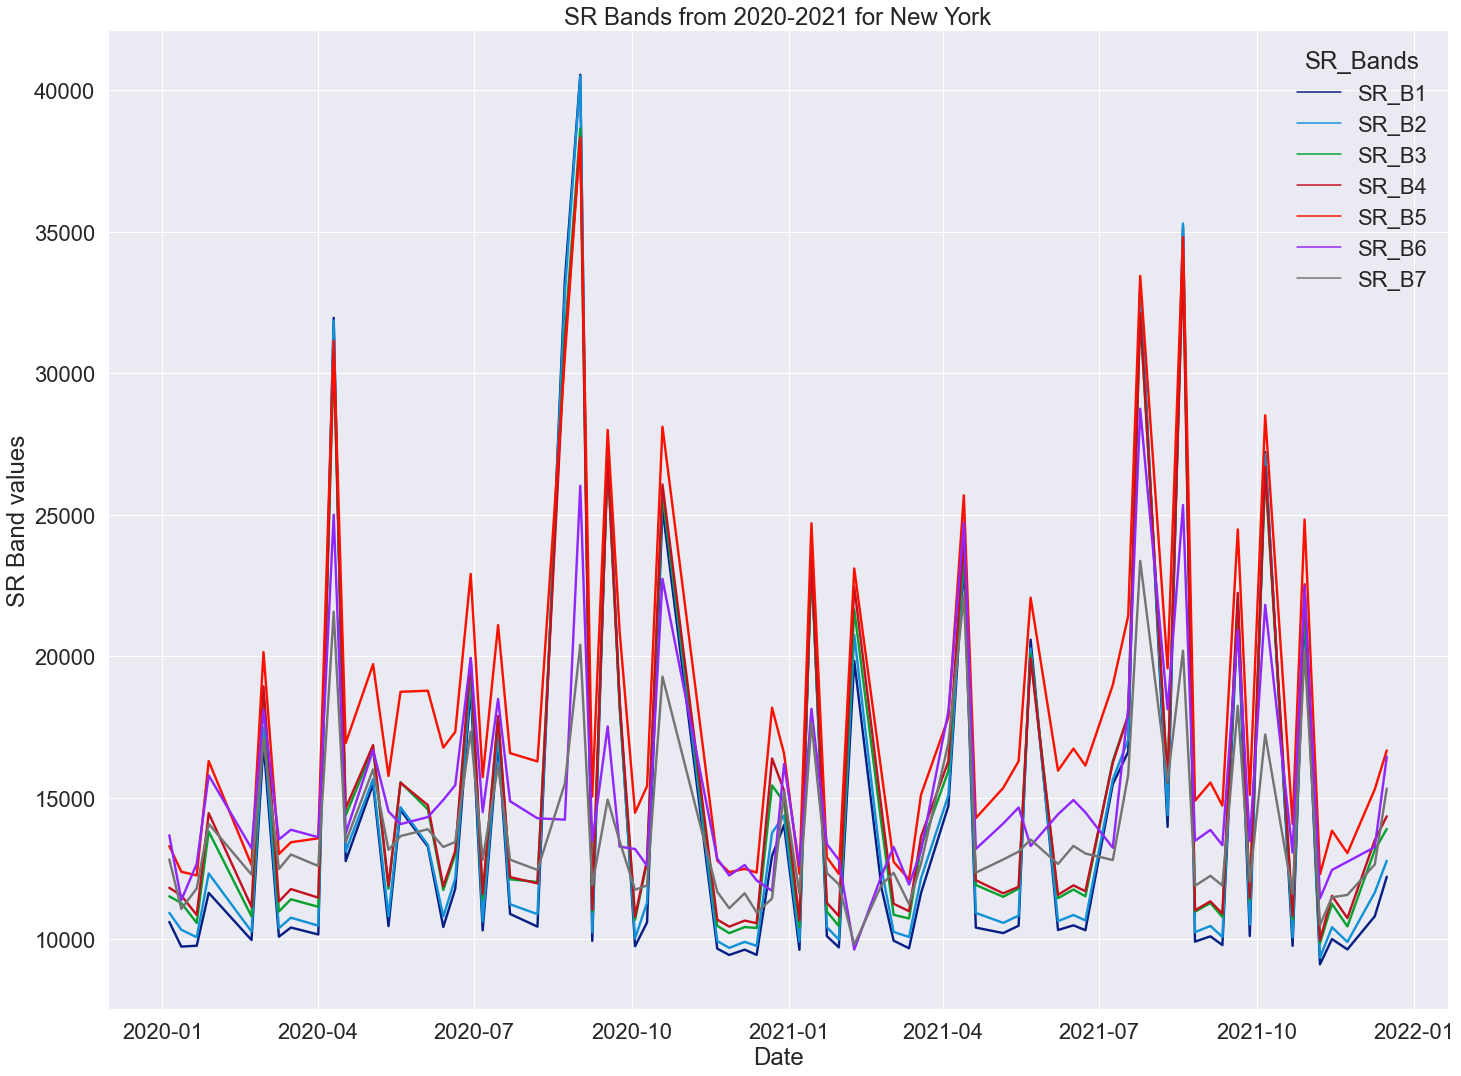

In [80]:
# Plot line plot
plt.figure(figsize=(24,18))
sns.set(font_scale = 2)
sns.lineplot(data=df1_pivot.reset_index(), x='Date', y='SR_Band_value', palette=colors, hue='SR_Bands', linewidth= 2.4)
plt.ylabel('SR Band values')
plt.title('SR Bands from 2020-2021 for New York')
plt.show()

## Plot monthly

In [81]:
# Melt for each 2019, 2020, and 2021 data
ny19_melt = ny19.melt(id_vars=['Date'], var_name='SR_Bands', value_name='SR_Band_value')
ny20_melt = ny20.melt(id_vars=['Date'], var_name='SR_Bands', value_name='SR_Band_value')
ny21_melt = ny21.melt(id_vars=['Date'], var_name='SR_Bands', value_name='SR_Band_value')

In [82]:
# Check
ny19_melt.head()

,Date,SR_Bands,SR_Band_value
0,2019-01-02,SR_B1,10877.838
1,2019-01-09,SR_B1,9449.261
2,2019-01-09,SR_B1,9541.560
3,2019-01-25,SR_B1,10040.215
4,2019-01-25,SR_B1,11153.185


In [83]:
# Make a copy of dataframe
ny19_melt_copy = ny19_melt.copy()
ny20_melt_copy = ny20_melt.copy()
ny21_melt_copy = ny21_melt.copy()

In [84]:
# Create column for month
ny19_melt_copy['month'] = ny19_melt_copy['Date'].dt.month
ny20_melt_copy['month'] = ny20_melt_copy['Date'].dt.month
ny21_melt_copy['month'] = ny21_melt_copy['Date'].dt.month

In [85]:
ny19_melt_copy.head()

,Date,SR_Bands,SR_Band_value,month
0,2019-01-02,SR_B1,10877.838,1
1,2019-01-09,SR_B1,9449.261,1
2,2019-01-09,SR_B1,9541.560,1
3,2019-01-25,SR_B1,10040.215,1
4,2019-01-25,SR_B1,11153.185,1


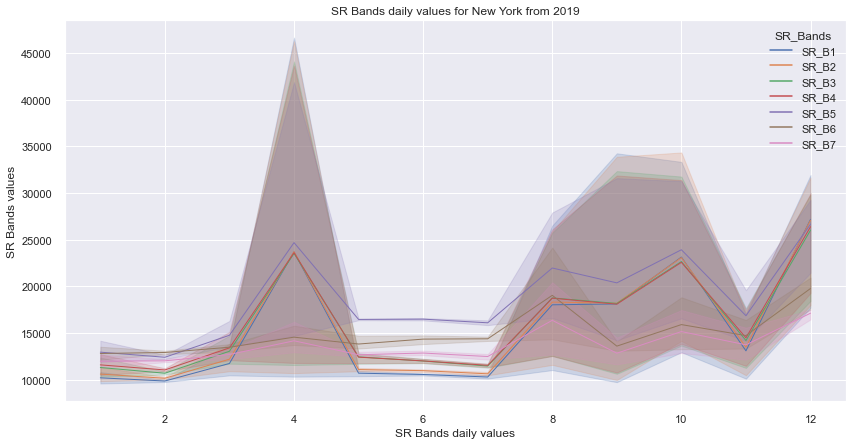

In [86]:
# Plot daily data
plt.style.use('seaborn')
plt.figure(figsize=(14,7))
sns.set(font_scale = 1)
sns.lineplot(data=ny19_melt_copy, x='month', y='SR_Band_value', hue='SR_Bands', linewidth= 1.0)
plt.xlabel('SR Bands daily values')
plt.ylabel('SR Bands values')
plt.title('SR Bands daily values for New York from 2019')
plt.show()

In [87]:
# Find out values for 'month'
ny19_melt_copy.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [88]:
ny19_melt.dtypes

Date             datetime64[ns]
SR_Bands                 object
SR_Band_value           float64
dtype: object

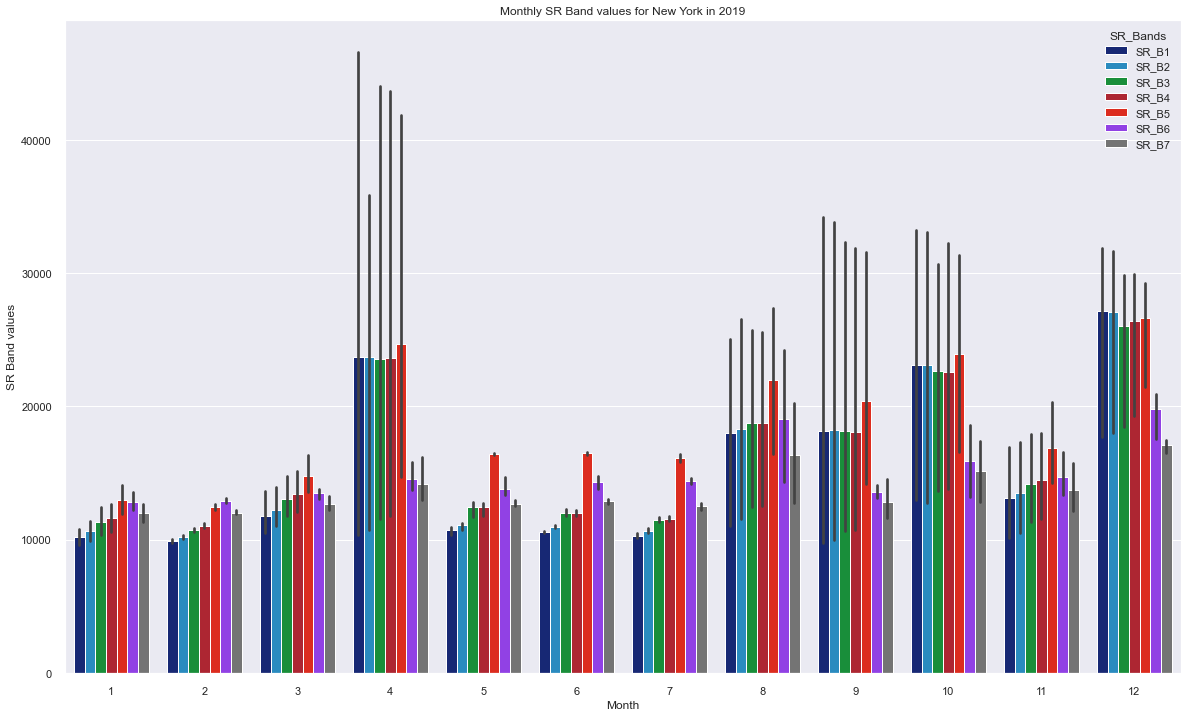

In [89]:
# Let's make a bar plot of SR Bands by monthly for 2019
plt.figure(figsize=(20,12))
sns.barplot(x= 'month', y='SR_Band_value', palette=colors, hue='SR_Bands', data = ny19_melt_copy)
plt.xlabel('Month')
plt.title('Monthly SR Band values for New York in 2019')
plt.ylabel('SR Band values')
plt.show()

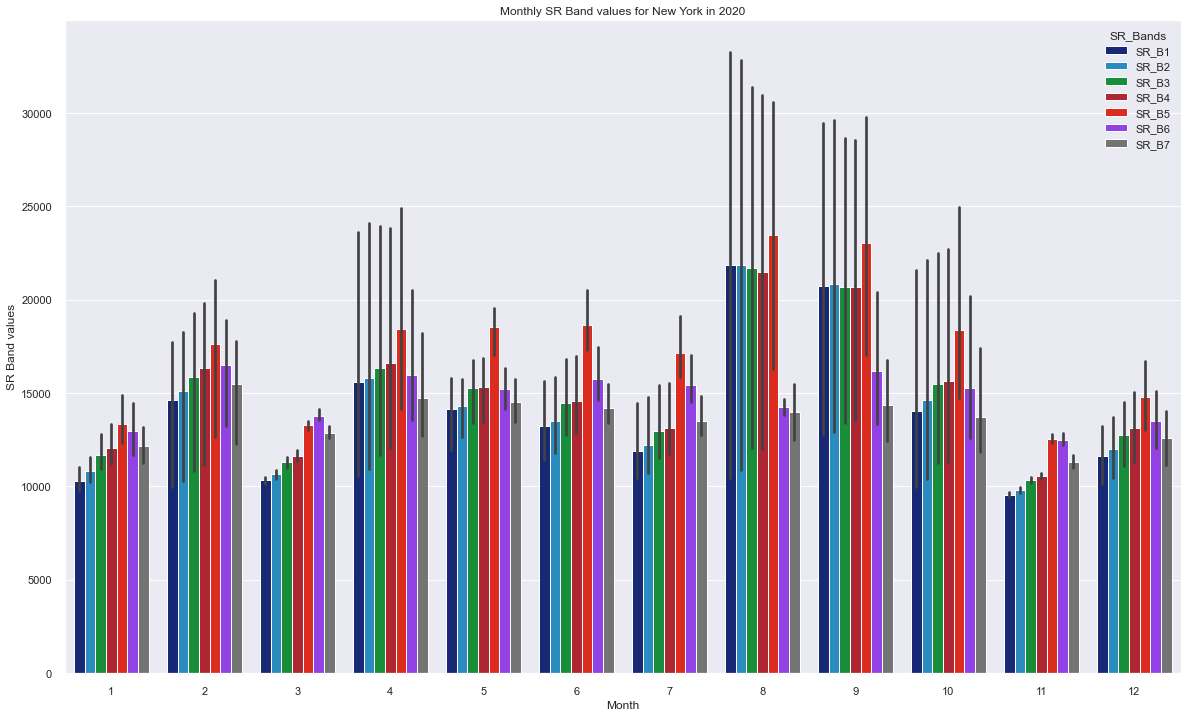

In [90]:
# SR Band values monthly for 2020
plt.figure(figsize=(20,12))
sns.barplot(x= 'month', y='SR_Band_value', palette=colors, hue='SR_Bands', data = ny20_melt_copy)
plt.xlabel('Month')
plt.title('Monthly SR Band values for New York in 2020')
plt.ylabel('SR Band values')
plt.show()

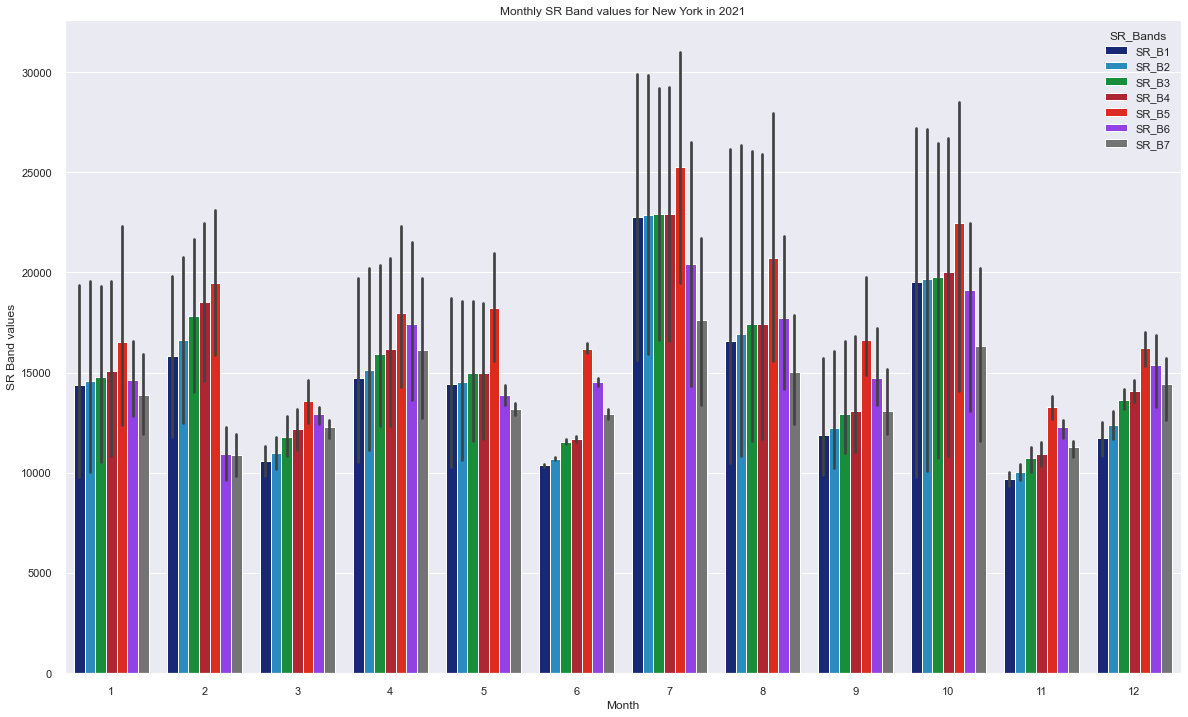

In [91]:
# SR Band values monthly for 2021
plt.figure(figsize=(20,12))
sns.barplot(x= 'month', y='SR_Band_value', palette=colors, hue='SR_Bands', data = ny21_melt_copy)
plt.xlabel('Month')
plt.title('Monthly SR Band values for New York in 2021')
plt.ylabel('SR Band values')
plt.show()

### Normalize

In [92]:
# Let's do 2019 first
avg, dev = ny19_melt_copy['SR_Band_value'].mean(), ny19_melt_copy['SR_Band_value'].std()

In [93]:
ny19_melt_copy['SR_Band_value'] = (ny19_melt_copy['SR_Band_value'] - avg)/dev

In [95]:
ny19_melt_copy.head()

,Date,SR_Bands,SR_Band_value,month
0,2019-01-02,SR_B1,-0.614643,1
1,2019-01-09,SR_B1,-0.804904,1
2,2019-01-09,SR_B1,-0.792611,1
3,2019-01-25,SR_B1,-0.726199,1
4,2019-01-25,SR_B1,-0.577972,1


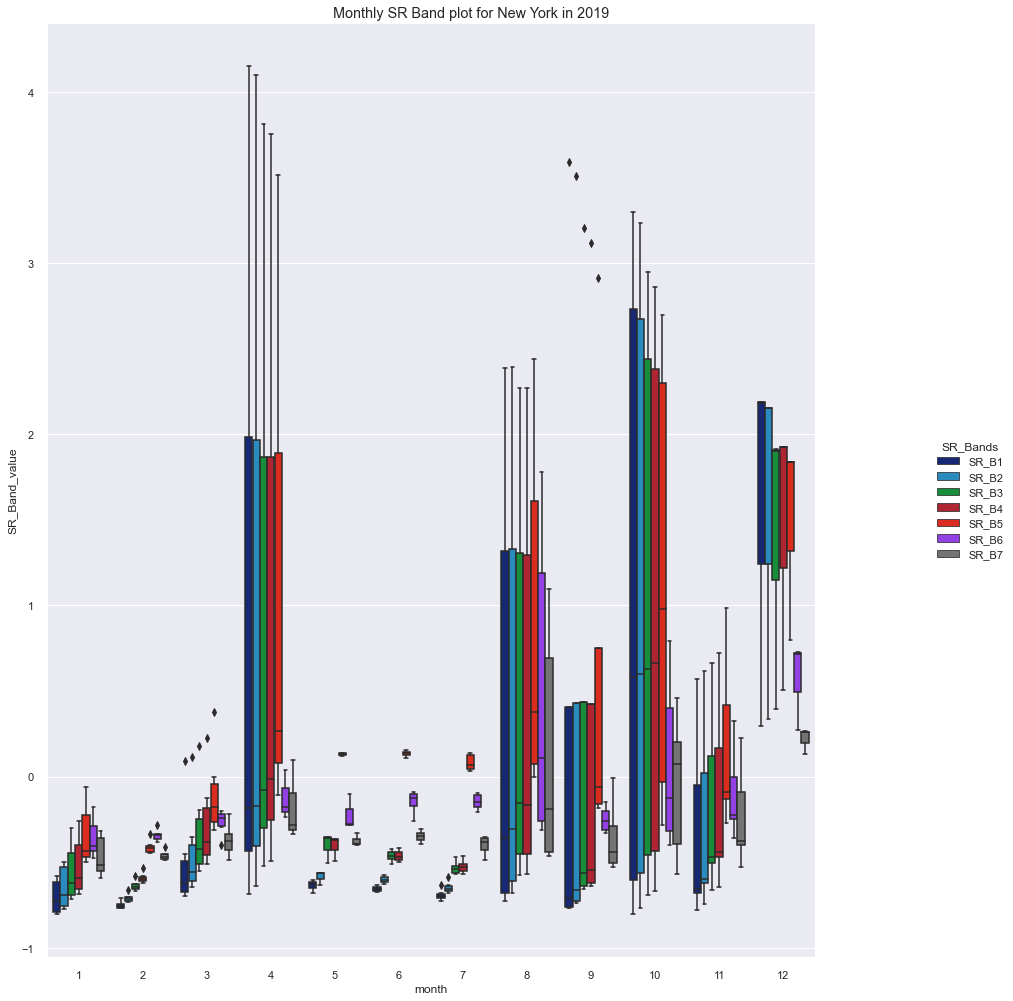

In [103]:
# Categorical plot
g = sns.catplot(x="month", y="SR_Band_value", data=ny19_melt_copy, hue='SR_Bands', palette=colors, kind="box")
g.fig.set_size_inches(15,15)
g.fig.suptitle('Monthly SR Band plot for New York in 2019')
plt.show()

In [100]:
# Now let's do 2020 and 2021
avg1, dev1 = ny20_melt_copy['SR_Band_value'].mean(), ny20_melt_copy['SR_Band_value'].std()
avg2, dev2 = ny21_melt_copy['SR_Band_value'].mean(), ny21_melt_copy['SR_Band_value'].std()

In [101]:
ny20_melt_copy['SR_Band_value'] = (ny20_melt_copy['SR_Band_value'] - avg)/dev
ny21_melt_copy['SR_Band_value'] = (ny21_melt_copy['SR_Band_value'] - avg)/dev

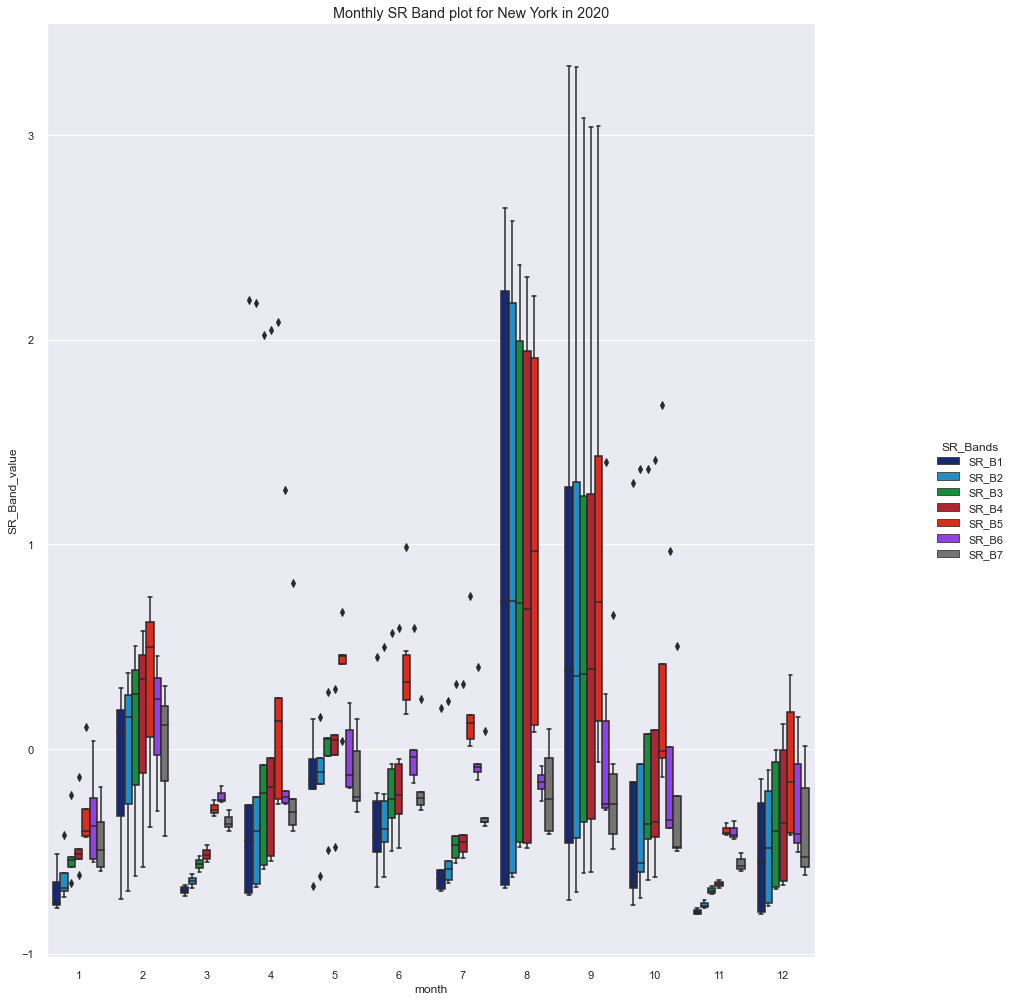

In [104]:
# Categorical plot for 2020
g1 = sns.catplot(x="month", y="SR_Band_value", data=ny20_melt_copy, hue='SR_Bands', palette=colors, kind="box")
g1.fig.set_size_inches(15,15)
g1.fig.suptitle('Monthly SR Band plot for New York in 2020')
plt.show()

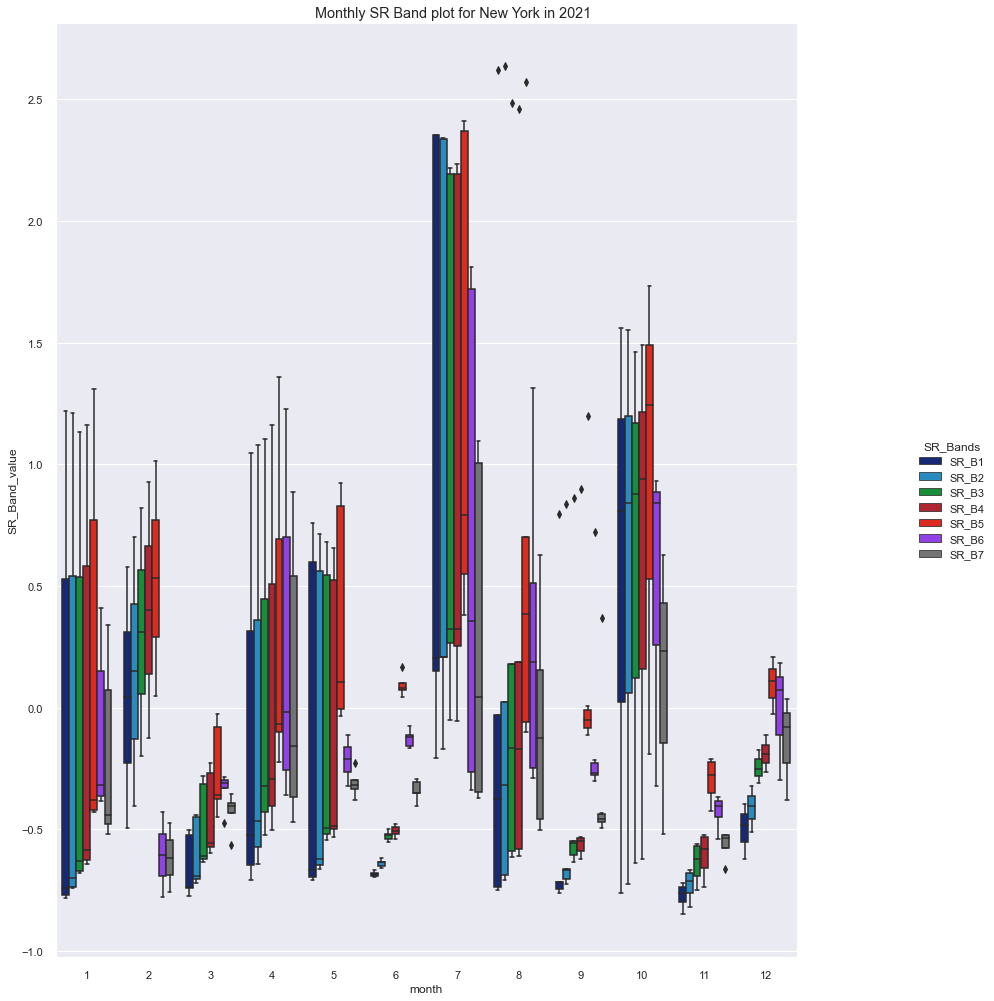

In [105]:
# Categorical plot for 2021
g2 = sns.catplot(x="month", y="SR_Band_value", data=ny21_melt_copy, hue='SR_Bands', palette=colors, kind="box")
g2.fig.set_size_inches(15,15)
g2.fig.suptitle('Monthly SR Band plot for New York in 2021')
plt.show()

## SR Band 3

Our main goal is to look at green bands, which is Band 3. This represents forest/greenland areas. 

In [98]:
# Subset for only SR Band 3
ny19_B3 = ny19_melt_copy[ny19_melt_copy['SR_Bands'] == 'SR_B3']
ny19_B3.head()

,Date,SR_Bands,SR_Band_value,month
114,2019-01-02,SR_B3,-0.300456,1
115,2019-01-09,SR_B3,-0.715255,1
116,2019-01-09,SR_B3,-0.692859,1
117,2019-01-25,SR_B3,-0.622064,1
118,2019-01-25,SR_B3,-0.449052,1


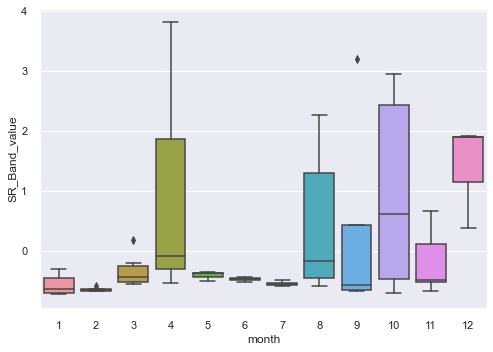

In [116]:
b3 = sns.boxplot(x='month', y='SR_Band_value', data=ny19_B3)

In [118]:
# Let's do the same for 2020 and 2021
ny20_B3 = ny20_melt_copy[ny20_melt_copy['SR_Bands'] == 'SR_B3']
ny21_B3 = ny21_melt_copy[ny21_melt_copy['SR_Bands'] == 'SR_B3']

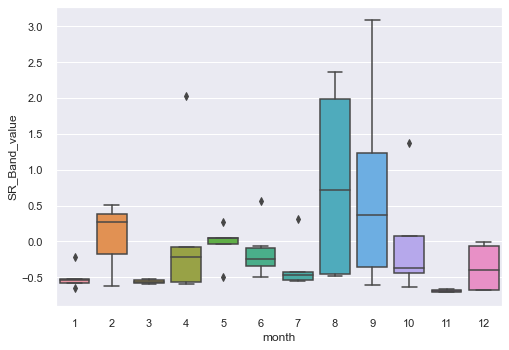

In [119]:
b3_20 = sns.boxplot(x='month', y='SR_Band_value', data=ny20_B3)

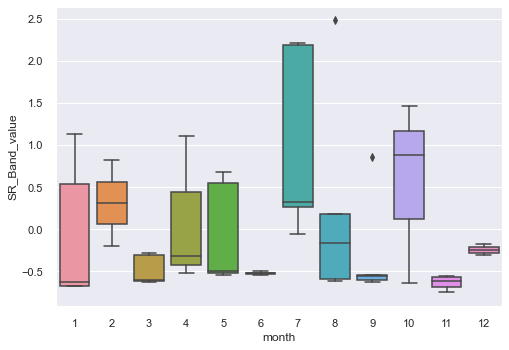

In [120]:
b3_21 = sns.boxplot(x='month', y='SR_Band_value', data=ny21_B3)

## SR Band 4

On the contrary, red bands or Band 4 represents non-forest area or developed areas.

In [122]:
# Subset for only SR Band 4
ny19_B4 = ny19_melt_copy[ny19_melt_copy['SR_Bands'] == 'SR_B4']
ny20_B4 = ny20_melt_copy[ny20_melt_copy['SR_Bands'] == 'SR_B4']
ny21_B4 = ny21_melt_copy[ny21_melt_copy['SR_Bands'] == 'SR_B4']

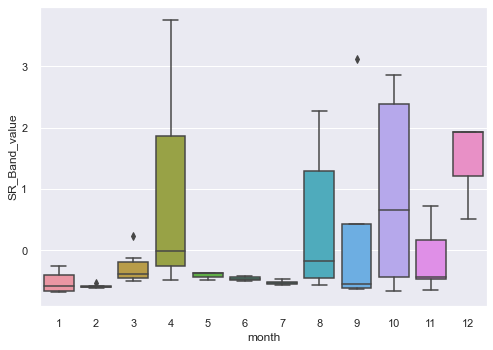

In [123]:
b4_19 = sns.boxplot(x='month', y='SR_Band_value', data=ny19_B4)

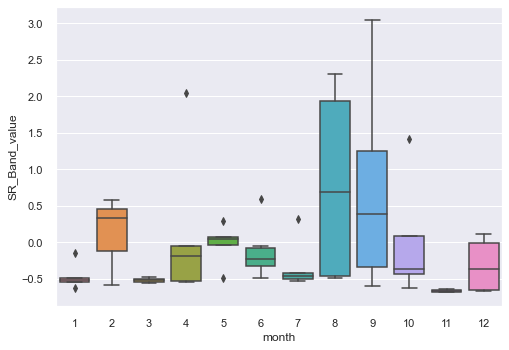

In [124]:
b4_20 = sns.boxplot(x='month', y='SR_Band_value', data=ny20_B4)

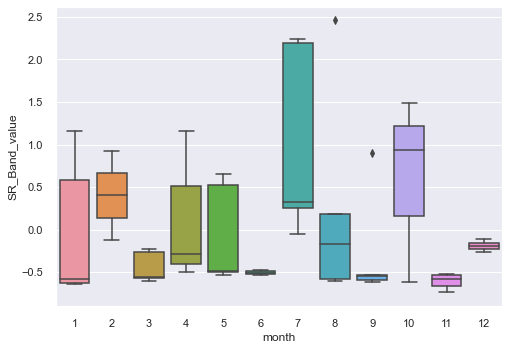

In [125]:
b4_21 = sns.boxplot(x='month', y='SR_Band_value', data=ny21_B4)